In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv(r'C:\Users\cansh\Documents\2.csv')
output=df['class']
output=np.array(output)
df=df.drop(['class'],axis=1)
arr=df.to_numpy()
arr.shape




(161, 42)

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
model= tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(42,)),tf.keras.layers.Dense(256,activation='sigmoid'),tf.keras.layers.Dense(3)])


In [5]:
preds = model(arr[:1]).numpy()
preds=tf.nn.softmax(preds).numpy()
preds


array([[0.39134374, 0.3079651 , 0.30069116]], dtype=float32)

In [6]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',loss=loss,metrics='accuracy')

In [7]:
history=model.fit(arr,output,epochs=100)

Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 1.0951 - accuracy: 0.3478
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 1.1118 - accuracy: 0.4224
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 1.0641 - accuracy: 0.4410
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 1.0849 - accuracy: 0.3230
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 1.0886 - accuracy: 0.3230
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 1.0936 - accuracy: 0.2733
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 1.0769 - accuracy: 0.4658
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 1.0606 - accuracy: 0.4224
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 1.0221 - accuracy: 0.4969
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 1.0511 - accuracy: 0.3478
Epoch 11/100
6/6 [===========

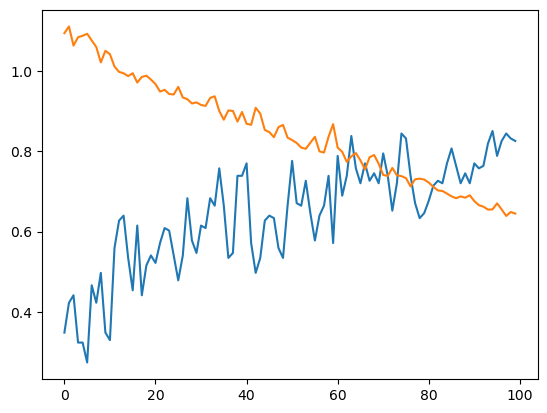

In [8]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.show()

In [10]:
import cv2 as cv
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands


cap = cv.VideoCapture(0)
with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
    
    
    while True:
        
        
        success,image=cap.read()
        cv.rectangle(image, (100, 100), (350, 400), (255, 0, 0), 10)

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
        image.flags.writeable = False
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        results = hands.process(image)

    # Draw the hand annotations on the image.
        image.flags.writeable = True
        image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
        if results.multi_hand_landmarks:
            
            for hand_landmarks in results.multi_hand_landmarks:
                
                mp_drawing.draw_landmarks(image,hand_landmarks,mp_hands.HAND_CONNECTIONS,mp_drawing_styles.get_default_hand_landmarks_style(),
                                          mp_drawing_styles.get_default_hand_connections_style())
                array=[]
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].x)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].x)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].x)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].x)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].x)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].x)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].x)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].x)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].x)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].x)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].x)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].x)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].x)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].x)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].x)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].x)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].x)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].x)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].x)  
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.WRIST].y)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_CMC].y)               
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_MCP].y)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP].y)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP].y)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_MCP].y)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_PIP].y)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_DIP].y)
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y)                
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_MCP].y)                
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_PIP].y)               
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_DIP].y)                
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.MIDDLE_FINGER_TIP].y)              
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_MCP].y)               
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_PIP].y)                
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_DIP].y)                
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.RING_FINGER_TIP].y)                
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_MCP].y)               
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_PIP].y)                
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_DIP].y)                
                array.append(hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y) 
                
               
                array=[array,]
                array=np.array(array)
                final=[]
                preds= model(array).numpy()
                preds=tf.nn.softmax(preds).numpy()
                ans=np.argmax(preds)
                '''''for i in preds:
                    list=i
                    largest=list[0]
                    for i in list:
                        if largest>i:
                            largest=largest
                        else:
                            largest=i   
                a=0
                while True:
                    if list[a]==largest:
                        break
                    else:
                           a=a+1
                    final.append(a)'''
                
                try:
                    x=str(ans)
                    if x=='0':
                        x='Fist'
                    elif x=='1':
                        x='Three/3'
                    elif x=='2':
                        x='Open Palm'
                    cv.putText(image,x,(50,50),cv.FONT_HERSHEY_SIMPLEX,1,(0,255,255),2,cv.LINE_4) 
                except:
                    cv.putText(image,'_',(50,50),cv.FONT_HERSHEY_SIMPLEX,1,(0,255,255),2,cv.LINE_4)
                    
                    
                   
                     
                
                
    # Flip the image horizontally for a selfie-view display.
        
        cv.imshow('MediaPipe Hands', image)
        
       
        if cv.waitKey(5) & 0xFF == 27:
            break
cap.release()
cv.destroyAllWindows()